In [1]:
import matplotlib.pyplot as plt
from datetime import datetime
import glob
import matplotlib.pyplot as plt
import numpy as np
clock_1="000000"
date_1 ="20240428"
time_1 = datetime.strptime(str(date_1)+str(clock_1), "%Y%m%d%H%M%S")
detfiles=glob.glob("/home/qxia/csvfile/20240418T1220.csv")#["csvfile/20231127T1732.csv"]+glob.glob("csvfile/20231206*.csv")+glob.glob("csvfile/20231208*.csv")+glob.glob("csvfile/20231209*.csv")+glob.glob("csvfile/20231210*.csv")
plist=[]
tlist_b=[]
tlist_t=[]
tlist_copper=[]
tlist_HV=[]
timelist=[]
heater_t=[]
heater_b=[]
hmin=0
hmax=500
for detfilename in sorted(detfiles):
    startline=0
    detfile=open(detfilename)
    #if "20231127T1732" in detfilename:
        #startline=36405
    for line in detfile.readlines()[startline:]:
        date=line.split(",")[0]
        clock=line.split(",")[1]
        t0=float(line.split(",")[3])
        t1=float(line.split(",")[5])
        t2=float(line.split(",")[4])
        t3=float(line.split(",")[6])
        p=float(line.split(",")[7])
        h1=float(line.split(",")[8])
        h2=float(line.split(",")[9])
        time = datetime.strptime(str(date)+str(clock), "%Y%m%d%H%M%S")
        delta=(time-time_1).total_seconds()/3600. #hour
        if delta<hmin:continue
        if delta>hmax:break
        timelist.append(delta)
        plist.append(p)
        tlist_t.append(t0)
        tlist_b.append(t1)
        tlist_copper.append(t2)
        tlist_HV.append(t3)
        heater_t.append(h1)
        heater_b.append(h2)
print (p)

0.811


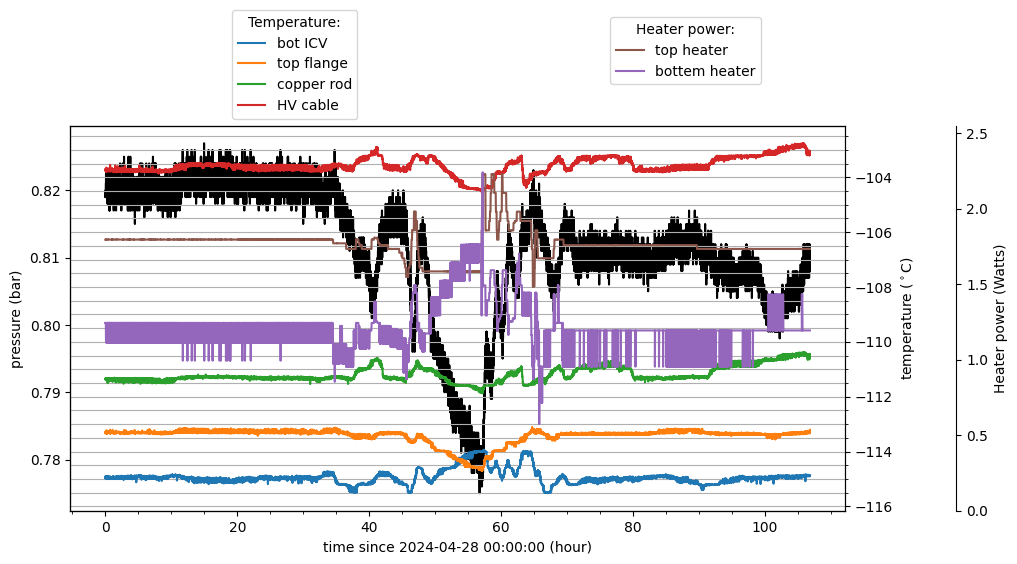

In [2]:
fig=plt.figure(figsize=(10,5))
ax1=plt.gca()
ax2 = ax1.twinx() 
ax3= ax1.twinx()
ax1.plot(timelist,plist,color="k")
ax2.plot(timelist,tlist_b,label="bot ICV")
ax2.plot(timelist,tlist_t,label="top flange")
ax2.plot(timelist,tlist_copper,label="copper rod")
ax2.plot(timelist,tlist_HV,label="HV cable")
ax1.set_xlabel("time since %s (hour)"%time_1)
ax1.set_ylabel("pressure (bar)",color="k")
ax2.set_ylabel("temperature ($^\circ$C)")
ax1.tick_params(axis='y', labelcolor="k")
ax2.tick_params(axis='y')
ax2.minorticks_on()
ax2.grid(which='both')
ax3.set_ylabel("Heater power (Watts)")
ax3.tick_params(axis='y')
ax3.set_ylim(0.,2.55)
ax3.plot(timelist,heater_t,label="top heater",color="tab:brown")
ax3.plot(timelist,heater_b,label="bottem heater",color="tab:purple")
ax3.spines['right'].set_position(('outward', 80))
ax2.legend(title="Temperature:",loc='best', bbox_to_anchor=(0.2, 1))
ax3.legend(loc="best",title="Heater power:", bbox_to_anchor=(0.9, 1.3))